In [12]:
import pandas as pd
import matplotlib.pyplot as plt

import os

In [13]:
!ls ../pruebas/ablacion/C1D_C2D/

train_log.csv  weights.pmt


# Load Data

In [14]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

ABLATIONS_PATH = '../pruebas/crossFamily/weights/RNaseP/'
CROSSFAMILY_PATH = '../pruebas/crossFamily/weights/'

# Listado de ablations y homologies
ablations = os.listdir(ABLATIONS_PATH)
print(f"Ablations: {ablations}")

cross_families = os.listdir(CROSSFAMILY_PATH)
print(f"cross families: {cross_families}")

# Inicializamos una lista para almacenar los DataFrames de los archivos train_log.csv
train_logs = []

# Recorrer cada crossFamily y ablation para buscar los archivos train_log.csv
for crossFamily in cross_families:
    for ablation in ablations:
        # Ruta del subdirectorio donde se encuentran los archivos train_log.csv
        train_file_path = os.path.join(CROSSFAMILY_PATH, crossFamily, ablation)
        
        # Verificamos si el directorio existe
        if os.path.isdir(train_file_path):
            # Verificar si el archivo 'train_log.csv' existe en el directorio
            train_file = 'train_log.csv'
            full_path = os.path.join(train_file_path, train_file)
            # Si el archivo existe, lo leemos
            if os.path.exists(full_path):
                try:
                    df = pd.read_csv(full_path)
                    
                    # Agregar columnas de 'ablation' y 'crossFamily'
                    df['ablation'] = ablation
                    df['crossFamily'] = crossFamily
                    
                    # Agregar el DataFrame a la lista
                    train_logs.append(df)
                    print(f"Successfully loaded {full_path}")
                except Exception as e:
                    print(f"Error loading {full_path}: {e}")

# Combinar todos los DataFrames en uno solo
if train_logs:
    df_logs = pd.concat(train_logs, ignore_index=True)
    print(f"Total rows in combined DataFrame: {df_logs.shape[0]}")
else:
    df_logs = pd.DataFrame()  # DataFrame vacío si no hay archivos cargados 


Ablations: ['C1D_C2D', 'sincfold', 'no_ResNet2d', 'sincfold_', '1ResNet2d', 'no_ResNet1d']
cross families: ['tRNA', 'RNaseP', 'telomerase']
Successfully loaded ../pruebas/crossFamily/weights/tRNA/C1D_C2D/train_log.csv
Successfully loaded ../pruebas/crossFamily/weights/tRNA/no_ResNet2d/train_log.csv
Successfully loaded ../pruebas/crossFamily/weights/tRNA/1ResNet2d/train_log.csv
Successfully loaded ../pruebas/crossFamily/weights/tRNA/no_ResNet1d/train_log.csv
Successfully loaded ../pruebas/crossFamily/weights/RNaseP/C1D_C2D/train_log.csv
Successfully loaded ../pruebas/crossFamily/weights/RNaseP/no_ResNet2d/train_log.csv
Successfully loaded ../pruebas/crossFamily/weights/RNaseP/1ResNet2d/train_log.csv
Successfully loaded ../pruebas/crossFamily/weights/RNaseP/no_ResNet1d/train_log.csv
Successfully loaded ../pruebas/crossFamily/weights/telomerase/C1D_C2D/train_log.csv
Successfully loaded ../pruebas/crossFamily/weights/telomerase/no_ResNet2d/train_log.csv
Successfully loaded ../pruebas/cross

In [15]:
df_logs.sample(5)

,epoch,train_f1,train_loss,valid_f1,valid_f1_post,valid_loss,ablation,crossFamily
19,19,0.5046,0.0328,0.4878,0.5522,0.0326,C1D_C2D,tRNA
137,17,0.9717,0.0011,0.8731,0.8883,0.0176,1ResNet2d,RNaseP
230,10,0.9506,0.0016,0.8596,0.8934,0.0113,no_ResNet1d,telomerase
3,3,0.3230,0.0464,0.3304,0.3528,0.0445,C1D_C2D,tRNA
216,16,0.9583,0.0015,0.8818,0.8900,0.0181,1ResNet2d,telomerase


In [ ]:
# df_logs.to_csv('../pruebas/crossFamily/data/results/train_valid_none.csv')

# Analisis de error

## Validacion random general

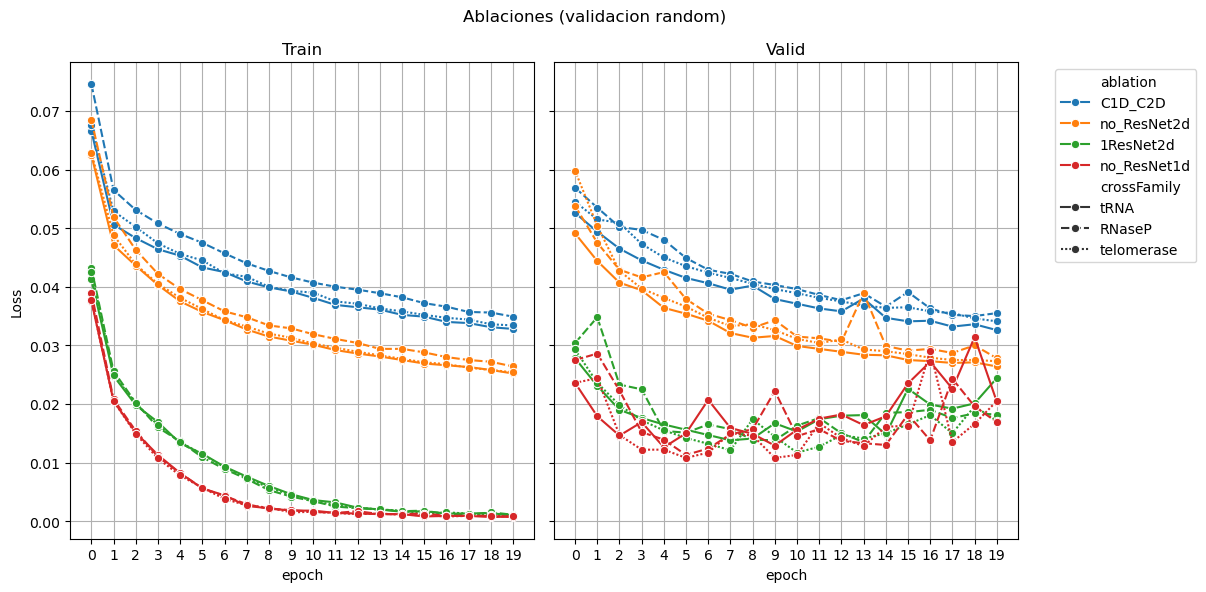

In [17]:
fig, axes = plt.subplots(1,2, figsize=(12,6), sharey=True)

# .query('ablation not in ["1ResNet2d", "no_ResNet1d"]')
sns.lineplot(data=df_logs, x='epoch' ,y='train_loss',hue='ablation', style='crossFamily', marker='o', ax=axes[0], legend=None)
sns.lineplot(data=df_logs, x='epoch' ,y='valid_loss',hue='ablation', style='crossFamily', marker='o', ax=axes[1])
for ax in axes: ax.grid()
for ax in axes: ax.set_xticks(range(20))
axes[0].set_ylabel('Loss')
axes[0].set_title('Train')
axes[1].set_title('Valid')
axes[1].legend(bbox_to_anchor=(1.4,1))
fig.suptitle('Ablaciones (validacion random)')
fig.tight_layout()
plt.show()

Observando el error: 
- los modelos mas complejos alcanzan menor error.
- las ablaciones se diferencian en la epoch 1.
- el error de validacion de los modelos sin capa 2d es decreciente.
- el error de validacion de los modelos con capas 2d luego de 4/5 epoch dejan de disminuir.

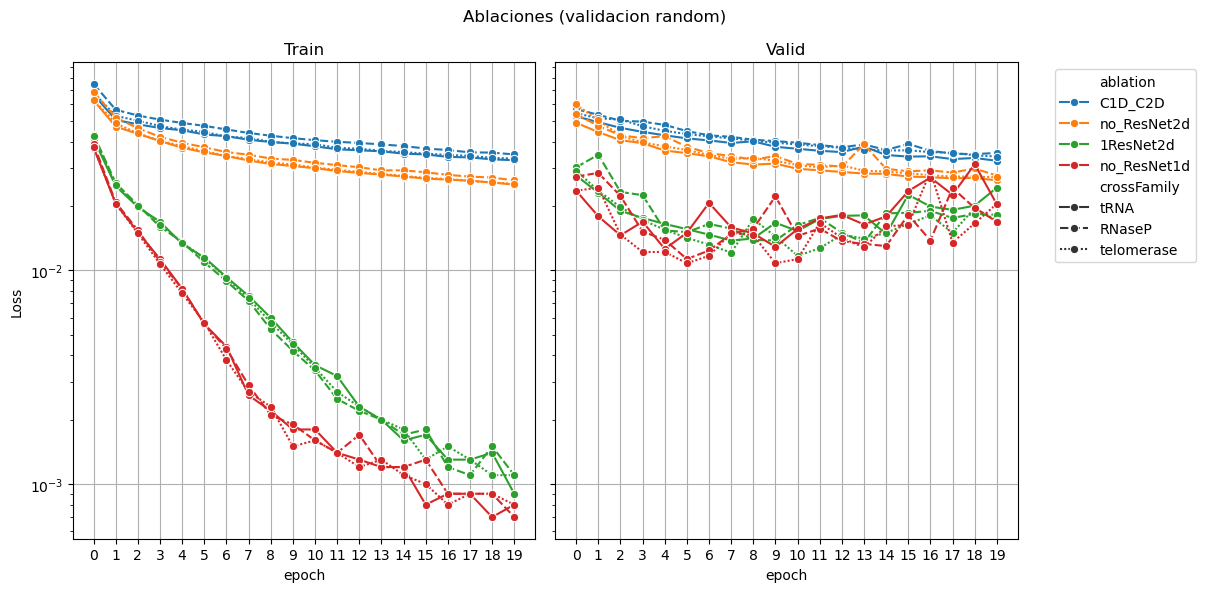

In [18]:
fig, axes = plt.subplots(1,2, figsize=(12,6), sharey=True)

# .query('ablation not in ["1ResNet2d", "no_ResNet1d"]')
sns.lineplot(data=df_logs, x='epoch' ,y='train_loss',hue='ablation', style='crossFamily', marker='o', ax=axes[0], legend=None)
sns.lineplot(data=df_logs, x='epoch' ,y='valid_loss',hue='ablation', style='crossFamily', marker='o', ax=axes[1])
for ax in axes: ax.grid()
for ax in axes: ax.set_xticks(range(20))
for ax in axes: ax.set_yscale('log')

axes[0].set_ylabel('Loss')
axes[0].set_title('Train')
axes[1].set_title('Valid')
axes[1].legend(bbox_to_anchor=(1.4,1))
fig.suptitle('Ablaciones (validacion random)')
fig.tight_layout()
plt.show()

In [19]:
df_logs

,epoch,train_f1,train_loss,valid_f1,valid_f1_post,valid_loss,ablation,crossFamily
0,0,0.2307,0.0666,0.2781,0.2716,0.0526,C1D_C2D,tRNA
1,1,0.2908,0.0506,0.2805,0.3121,0.0494,C1D_C2D,tRNA
2,2,0.3079,0.0483,0.3112,0.3367,0.0465,C1D_C2D,tRNA
3,3,0.3230,0.0464,0.3304,0.3528,0.0445,C1D_C2D,tRNA
4,4,0.3379,0.0453,0.3535,0.3631,0.0429,C1D_C2D,tRNA
...,...,...,...,...,...,...,...,...
235,15,0.9705,0.0010,0.9029,0.9127,0.0163,no_ResNet1d,telomerase
236,16,0.9739,0.0008,0.8922,0.8959,0.0291,no_ResNet1d,telomerase
237,17,0.9718,0.0009,0.8843,0.9035,0.0135,no_ResNet1d,telomerase
238,18,0.9712,0.0009,0.9055,0.9139,0.0166,no_ResNet1d,telomerase


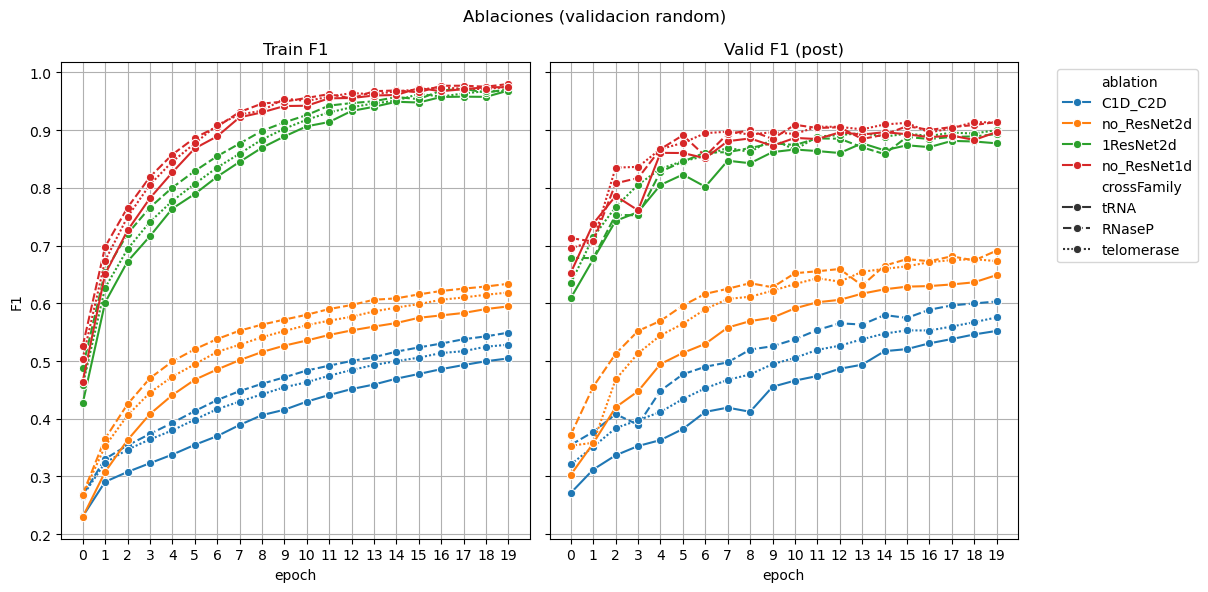

In [20]:
fig, axes = plt.subplots(1,2, figsize=(12,6), sharey=True)

# .query('ablation not in ["1ResNet2d", "no_ResNet1d"]')
sns.lineplot(data=df_logs, x='epoch' ,y='train_f1',hue='ablation', style='crossFamily', marker='o', ax=axes[0], legend=None)
sns.lineplot(data=df_logs, x='epoch' ,y='valid_f1_post',hue='ablation', style='crossFamily', marker='o', ax=axes[1])
for ax in axes: ax.grid()
for ax in axes: ax.set_xticks(range(20))
axes[0].set_ylabel('F1')
axes[0].set_title('Train F1')
axes[1].set_title('Valid F1 (post)')
axes[1].legend(bbox_to_anchor=(1.4,1))
fig.suptitle('Ablaciones (validacion random)')
fig.tight_layout()
plt.show()

## Validacion Random individual

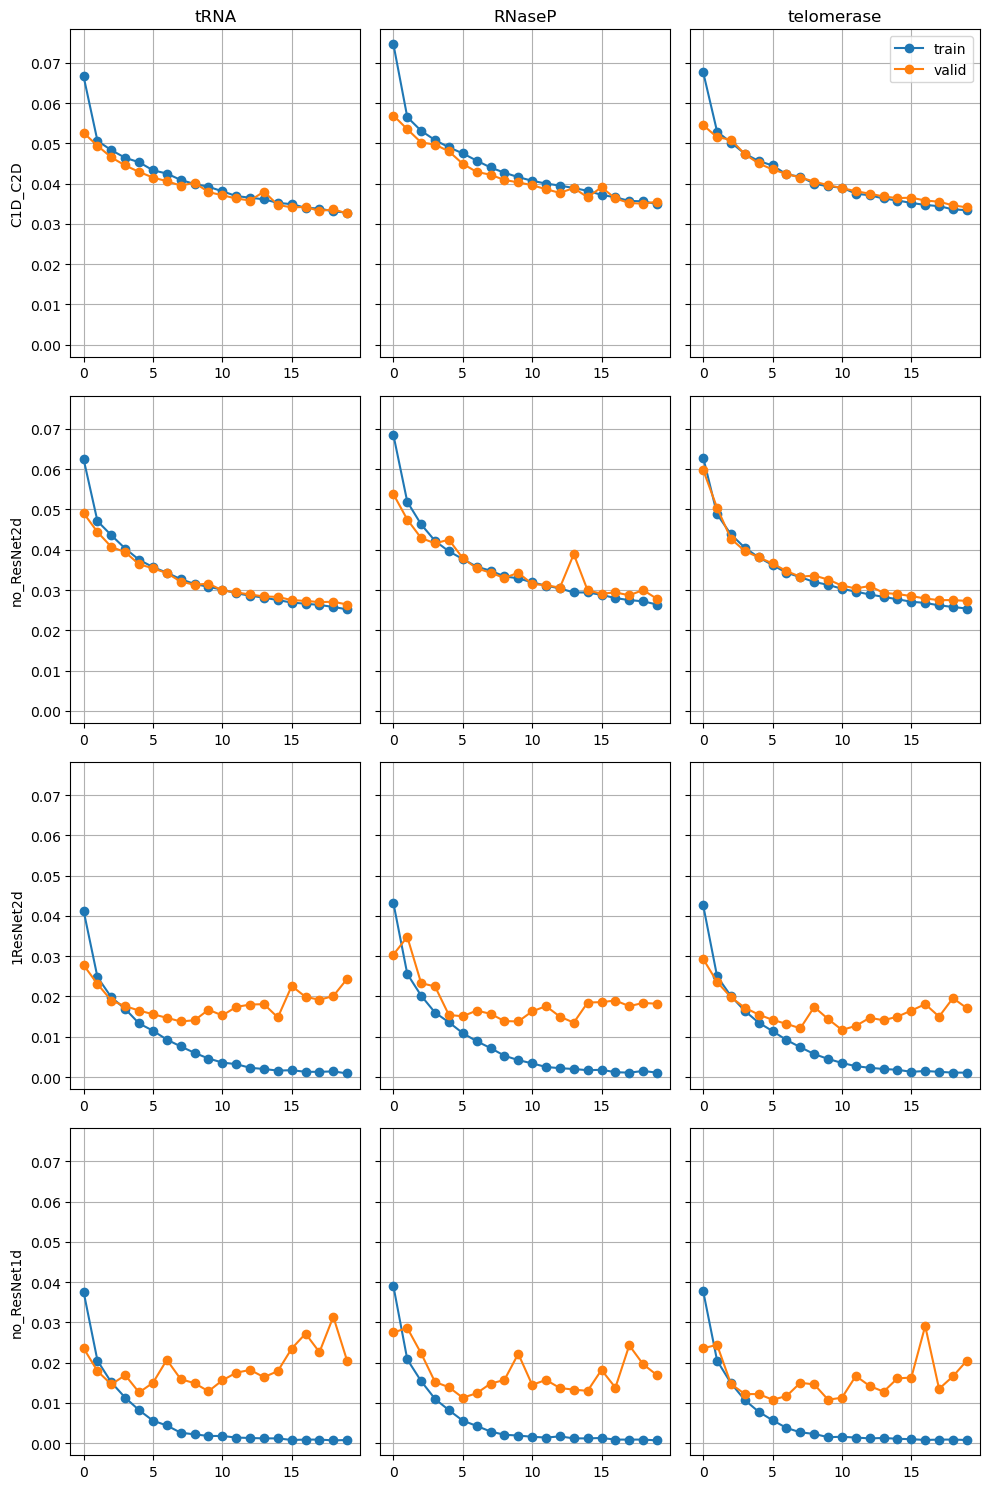

In [21]:
data = df_logs
ab = data.ablation.unique()
cf = data.crossFamily.unique()
fig, axes = plt.subplots(len(ab),len(cf), figsize=(10,15), sharey=True)
for i,a in enumerate(ab):
    axes[i,0].set_ylabel(a)
    for j,f in enumerate(cf):
        axes[0,j].set_title(f)
        d = data.query('ablation == @a & crossFamily == @f')
        axes[i,j].plot(d.epoch, d.train_loss, marker='o', label='train')
        axes[i,j].plot(d.epoch, d.valid_loss, marker='o', label='valid') 
        axes[i,j].grid()
axes[0,-1].legend()        
fig.tight_layout()

Las ablaciones con capas 2d tienen error de validacion mayor. Podria considerarse que a 10 epoch empiezaz a crecer en estos casos.

## Train con test en validacion 

In [23]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

ABLATIONS_PATH = '../pruebas/crossFamily/weights/RNaseP/'
CROSSFAMILY_PATH = '../pruebas/crossFamily/weights/'

# Listado de ablations y homologies
ablations = os.listdir(ABLATIONS_PATH)
print(f"Ablations: {ablations}")

cross_families = os.listdir(CROSSFAMILY_PATH)
print(f"cross families: {cross_families}")

# Inicializamos una lista para almacenar los DataFrames de los archivos train_log.csv
train_logs = []

# Recorrer cada crossFamily y ablation para buscar los archivos train_log.csv
for crossFamily in cross_families:
    for ablation in ablations:
        # Ruta del subdirectorio donde se encuentran los archivos train_log.csv
        train_file_path = os.path.join(CROSSFAMILY_PATH, crossFamily, ablation, 'valid_with_test')
        
        # Verificamos si el directorio existe
        if os.path.isdir(train_file_path):
            # Verificar si el archivo 'train_log.csv' existe en el directorio
            train_file = 'train_log.csv'
            full_path = os.path.join(train_file_path, train_file)
            
            # Si el archivo existe, lo leemos
            if os.path.exists(full_path):
                try:
                    df = pd.read_csv(full_path)
                    
                    # Agregar columnas de 'ablation' y 'crossFamily'
                    df['ablation'] = ablation
                    df['crossFamily'] = crossFamily
                    
                    # Agregar el DataFrame a la lista
                    train_logs.append(df)
                    print(f"Successfully loaded {full_path}")
                except Exception as e:
                    print(f"Error loading {full_path}: {e}")

# Combinar todos los DataFrames en uno solo
if train_logs:
    train_log_with_valid = pd.concat(train_logs, ignore_index=True)
    print(f"Total rows in combined DataFrame: {train_log_with_valid.shape[0]}")
else:
    train_log_with_valid = pd.DataFrame()  # DataFrame vacío si no hay archivos cargados 


Ablations: ['C1D_C2D', 'sincfold', 'no_ResNet2d', 'sincfold_', '1ResNet2d', 'no_ResNet1d']
cross families: ['tRNA', 'RNaseP', 'telomerase']
Successfully loaded ../pruebas/crossFamily/weights/tRNA/C1D_C2D/valid_with_test/train_log.csv
Successfully loaded ../pruebas/crossFamily/weights/tRNA/no_ResNet2d/valid_with_test/train_log.csv
Successfully loaded ../pruebas/crossFamily/weights/tRNA/sincfold_/valid_with_test/train_log.csv
Successfully loaded ../pruebas/crossFamily/weights/RNaseP/C1D_C2D/valid_with_test/train_log.csv
Successfully loaded ../pruebas/crossFamily/weights/RNaseP/no_ResNet2d/valid_with_test/train_log.csv
Successfully loaded ../pruebas/crossFamily/weights/RNaseP/sincfold_/valid_with_test/train_log.csv
Successfully loaded ../pruebas/crossFamily/weights/telomerase/C1D_C2D/valid_with_test/train_log.csv
Successfully loaded ../pruebas/crossFamily/weights/telomerase/no_ResNet2d/valid_with_test/train_log.csv
Successfully loaded ../pruebas/crossFamily/weights/telomerase/sincfold_/va

In [24]:
train_log_with_valid['epoch'].astype(int)

0       0
1       1
2       2
3       3
4       4
       ..
175    15
176    16
177    17
178    18
179    19
Name: epoch, Length: 180, dtype: int64

In [ ]:
# train_log_with_valid.to_csv('../pruebas/crossFamily/data/results/train_valid_with_test.csv')

In [26]:
df_logs.to_csv('../pruebas/crossFamily/data/results/train_valid_none.csv')

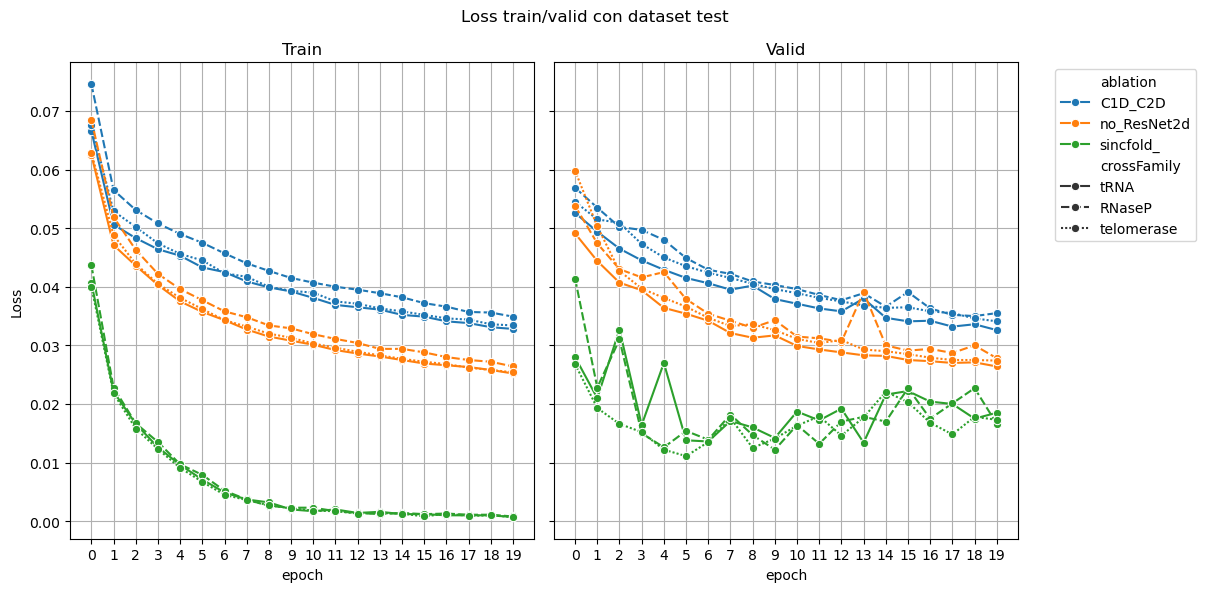

In [28]:
fig, axes = plt.subplots(1,2, figsize=(12,6), sharey=True)
sns.lineplot(data=train_log_with_valid, x='epoch' ,y='train_loss',hue='ablation', style='crossFamily', marker='o', ax=axes[0], legend=None)
sns.lineplot(data=train_log_with_valid, x='epoch' ,y='valid_loss',hue='ablation', style='crossFamily', marker='o', ax=axes[1])
for ax in axes: ax.grid()
for ax in axes: ax.set_xticks(range(20))
axes[0].set_ylabel('Loss')
axes[0].set_title('Train')
axes[1].set_title('Valid')
axes[1].legend(bbox_to_anchor=(1.4,1))

fig.suptitle('Loss train/valid con dataset test')
fig.tight_layout()
plt.show()

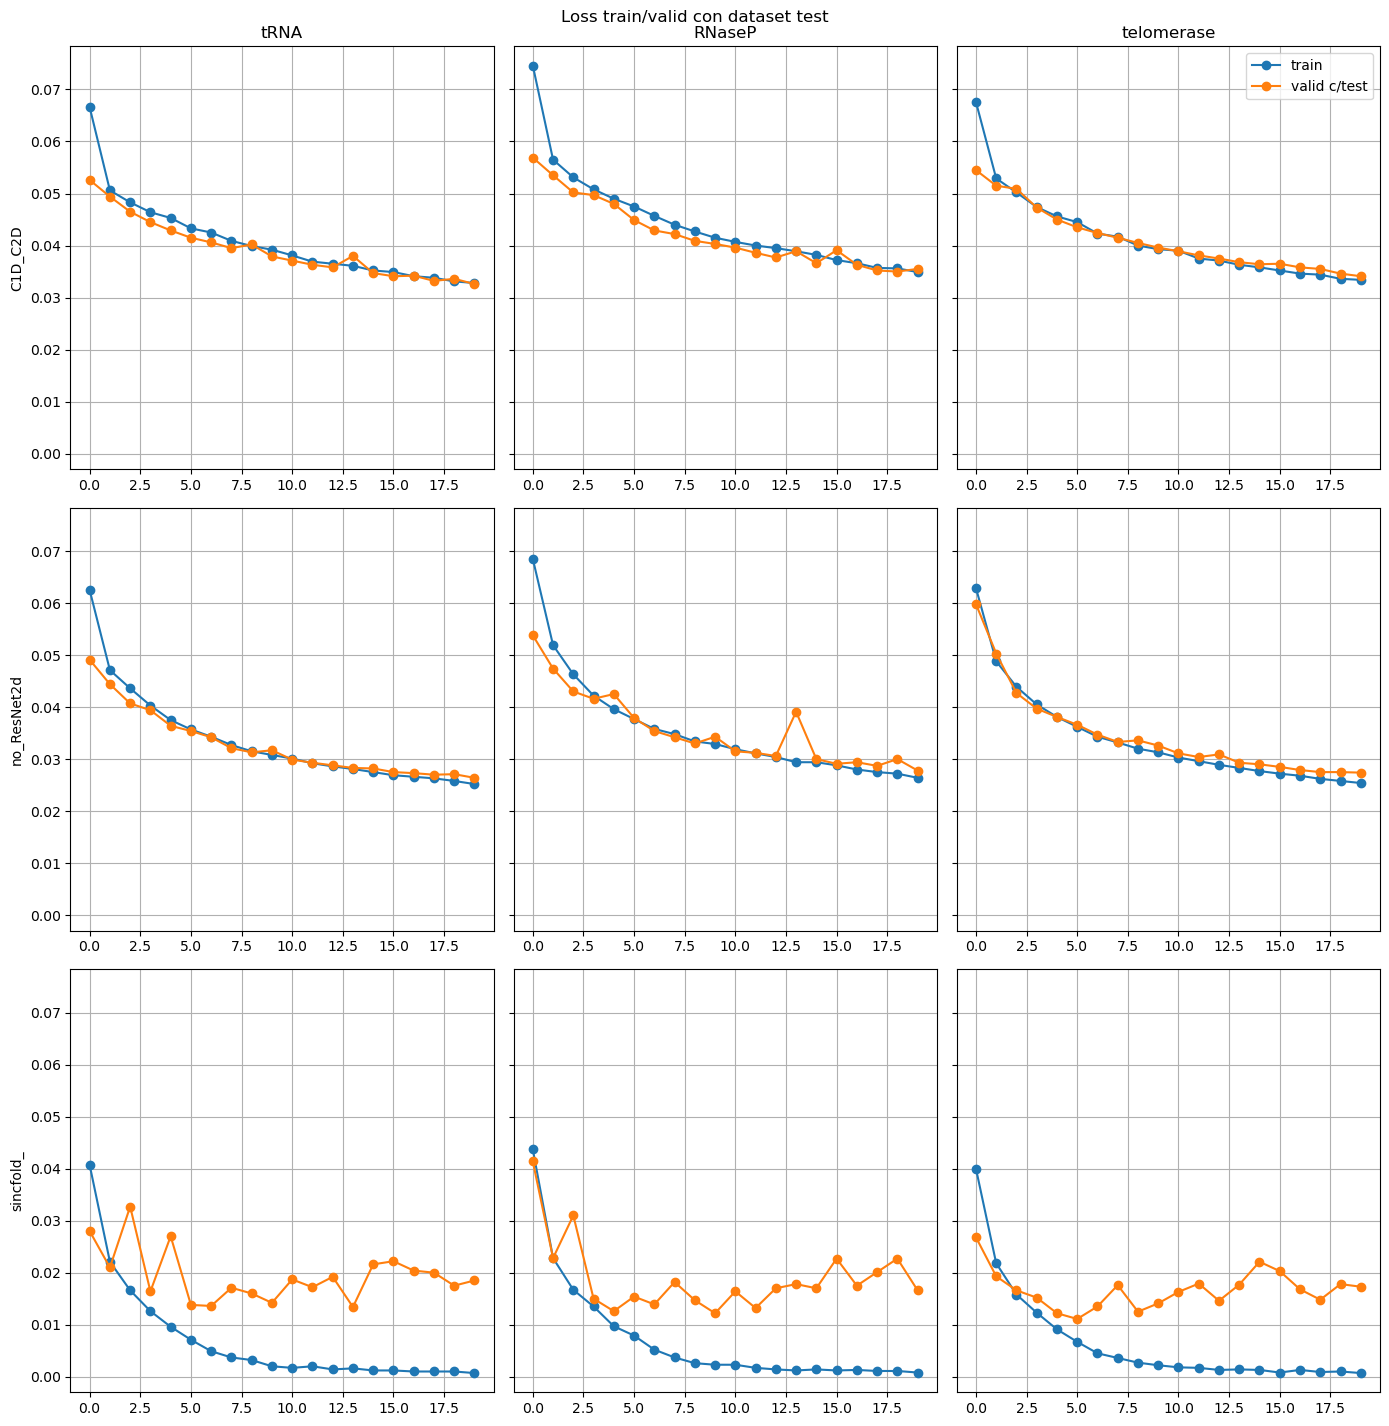

In [29]:
data = train_log_with_valid
ab = data.ablation.unique()
cf = data.crossFamily.unique()
fig, axes = plt.subplots(len(ab),len(cf), figsize=(14,14.5), sharey=True)
for i,a in enumerate(ab):
    axes[i,0].set_ylabel(a)
    for j,f in enumerate(cf):
        axes[0,j].set_title(f)
        d = data.query('ablation == @a & crossFamily == @f')
        axes[i,j].plot(d.epoch, d.train_loss, marker='o', label='train')
        axes[i,j].plot(d.epoch, d.valid_loss, marker='o', label='valid c/test')
        axes[i,j].grid()
axes[0,-1].legend()        
fig.suptitle('Loss train/valid con dataset test')
fig.tight_layout()

## Agrego a grafica train random el entrenamiento del sincfold (con valid=test)

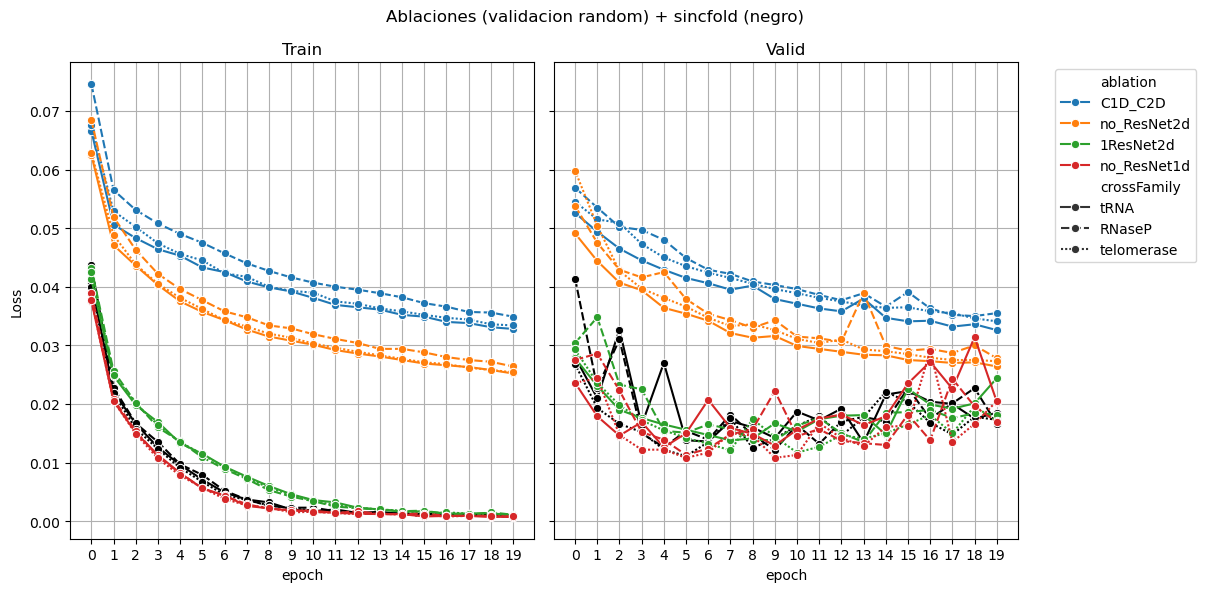

In [30]:
fig, axes = plt.subplots(1,2, figsize=(12,6), sharey=True)

# .query('ablation not in ["1ResNet2d", "no_ResNet1d"]')
sns.lineplot(data=train_log_with_valid.query('ablation == "sincfold_"'), x='epoch' ,y='train_loss', style='crossFamily',color='black', marker='o', ax=axes[0], legend=None)
sns.lineplot(data=train_log_with_valid.query('ablation == "sincfold_"'), x='epoch' ,y='valid_loss', style='crossFamily',color='black', marker='o', ax=axes[1], legend=None)
sns.lineplot(data=df_logs, x='epoch' ,y='train_loss',hue='ablation', style='crossFamily', marker='o', ax=axes[0], legend=None)
sns.lineplot(data=df_logs, x='epoch' ,y='valid_loss',hue='ablation', style='crossFamily', marker='o', ax=axes[1])

for ax in axes: ax.grid()
for ax in axes: ax.set_xticks(range(20))
axes[0].set_ylabel('Loss')
axes[0].set_title('Train')
axes[1].set_title('Valid')
axes[1].legend(bbox_to_anchor=(1.4,1))
fig.suptitle('Ablaciones (validacion random) + sincfold (negro)')
fig.tight_layout()
plt.show()

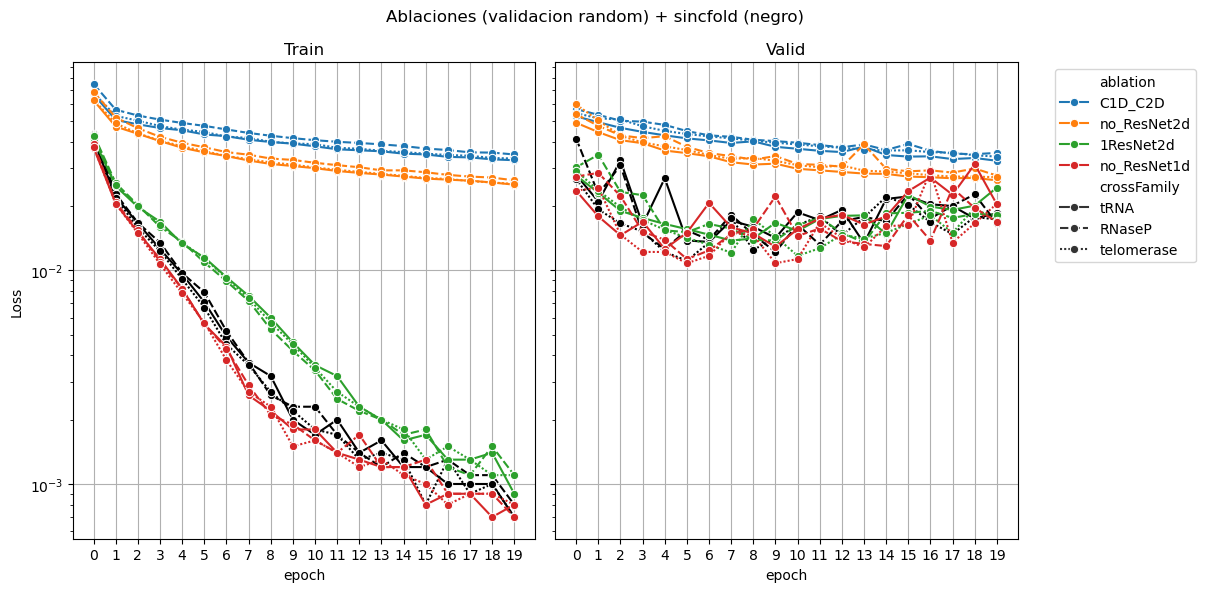

In [31]:
fig, axes = plt.subplots(1,2, figsize=(12,6), sharey=True)

# .query('ablation not in ["1ResNet2d", "no_ResNet1d"]')
sns.lineplot(data=train_log_with_valid.query('ablation == "sincfold_"'), x='epoch' ,y='train_loss', style='crossFamily',color='black', marker='o', ax=axes[0], legend=None)
sns.lineplot(data=train_log_with_valid.query('ablation == "sincfold_"'), x='epoch' ,y='valid_loss', style='crossFamily',color='black', marker='o', ax=axes[1], legend=None)
sns.lineplot(data=df_logs, x='epoch' ,y='train_loss',hue='ablation', style='crossFamily', marker='o', ax=axes[0], legend=None)
sns.lineplot(data=df_logs, x='epoch' ,y='valid_loss',hue='ablation', style='crossFamily', marker='o', ax=axes[1])

for ax in axes: ax.set_yscale('log')
for ax in axes: ax.grid()
for ax in axes: ax.set_xticks(range(20))
axes[0].set_ylabel('Loss')
axes[0].set_title('Train')
axes[1].set_title('Valid')
axes[1].legend(bbox_to_anchor=(1.4,1))
fig.suptitle('Ablaciones (validacion random) + sincfold (negro)')
fig.tight_layout()
plt.show()

## Analisis F1

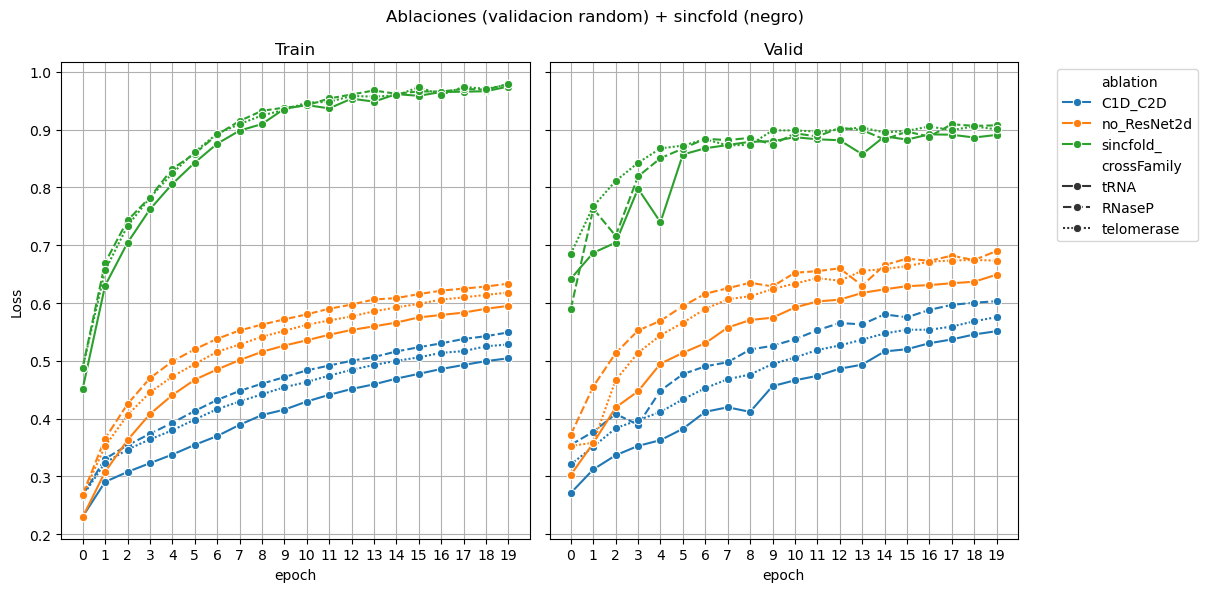

In [32]:
fig, axes = plt.subplots(1,2, figsize=(12,6), sharey=True)

# # .query('ablation not in ["1ResNet2d", "no_ResNet1d"]')
# sns.lineplot(data=train_log_with_valid.query('ablation == "sincfold_"'), x='epoch' ,y='train_f1', style='crossFamily',color='black', marker='o', ax=axes[0], legend=None)
# sns.lineplot(data=train_log_with_valid.query('ablation == "sincfold_"'), x='epoch' ,y='valid_f1_post', style='crossFamily',color='black', marker='o', ax=axes[1], legend=None)
sns.lineplot(data=train_log_with_valid, x='epoch' ,y='train_f1',hue='ablation', style='crossFamily', marker='o', ax=axes[0], legend=None)
sns.lineplot(data=train_log_with_valid, x='epoch' ,y='valid_f1_post',hue='ablation', style='crossFamily', marker='o', ax=axes[1])
 
for ax in axes: ax.grid()
for ax in axes: ax.set_xticks(range(20))
axes[0].set_ylabel('Loss')
axes[0].set_title('Train')
axes[1].set_title('Valid')
axes[1].legend(bbox_to_anchor=(1.4,1))
fig.suptitle('Ablaciones (validacion random) + sincfold (negro)')
fig.tight_layout()
plt.show()

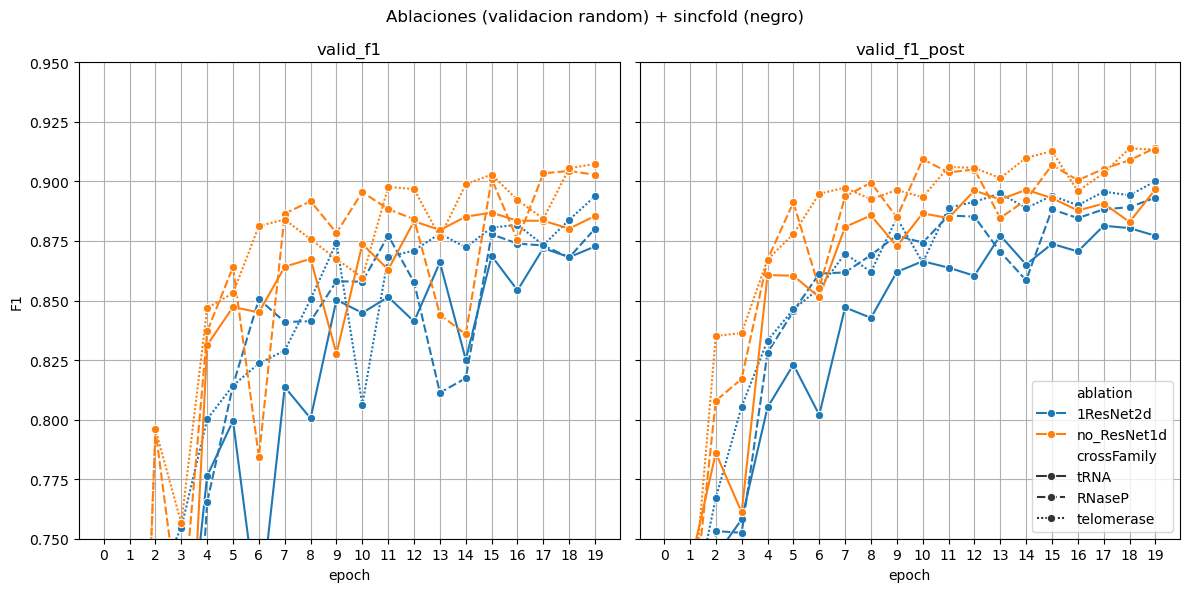

In [33]:
fig, axes = plt.subplots(1,2, figsize=(12,6), sharey=True,sharex=True)

# .query('ablation not in ["1ResNet2d", "no_ResNet1d"]')
sns.lineplot(data=train_log_with_valid.query('ablation == "sincfold"'), x='epoch' ,y='valid_f1', style='crossFamily',color='black', marker='o', ax=axes[0], legend=None)
sns.lineplot(data=train_log_with_valid.query('ablation == "sincfold"'), x='epoch' ,y='valid_f1_post', style='crossFamily',color='black', marker='o', ax=axes[1], legend=None) 
df = df_logs.query('ablation in ["1ResNet2d", "no_ResNet1d"]')
sns.lineplot(data=df, x='epoch' ,y='valid_f1',hue='ablation', style='crossFamily', marker='o', ax=axes[0], legend=None)
sns.lineplot(data=df, x='epoch' ,y='valid_f1_post',hue='ablation', style='crossFamily', marker='o', ax=axes[1])

for ax in axes: ax.grid()
for ax in axes: ax.set_xticks(range(20))
axes[0].set_ylim([0.75,0.95])
# axes[0].set_xlim([4.9,10.1])
axes[0].set_ylabel('F1')
axes[0].set_title('valid_f1')
axes[1].set_title('valid_f1_post')
# axes[1].legend(bbox_to_anchor=(1,1))
fig.suptitle('Ablaciones (validacion random) + sincfold (negro)')
fig.tight_layout()
plt.show()

## Comparacion en el error de validacion entre el dataset random y el dataset de test

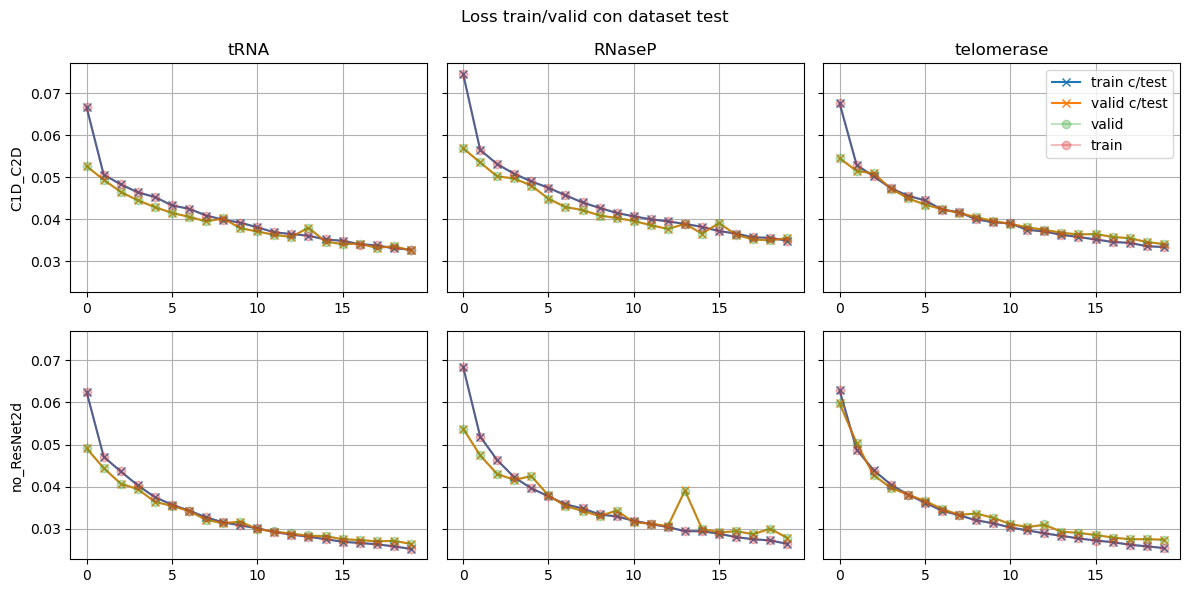

In [34]:
data = df_logs
data_valid = train_log_with_valid
ab = ["C1D_C2D", "no_ResNet2d"]
cf = data.crossFamily.unique()
fig, axes = plt.subplots(len(ab),len(cf), figsize=(12,6), sharey=True)
for i,a in enumerate(ab):
    axes[i,0].set_ylabel(a)
    for j,f in enumerate(cf):
        axes[0,j].set_title(f)
        d = data.query('ablation == @a & crossFamily == @f')        
        dv = data_valid.query('ablation == @a & crossFamily == @f')
        axes[i,j].plot(dv.epoch, dv.train_loss, marker='x', label='train c/test')
        axes[i,j].plot(dv.epoch, dv.valid_loss, marker='x', label='valid c/test')
        axes[i,j].plot(d.epoch, d.valid_loss, marker='o', label='valid', alpha=0.3)
        axes[i,j].plot(d.epoch, d.train_loss, marker='o', label='train', alpha=0.3)

        axes[i,j].grid()
axes[0,-1].legend()        
fig.suptitle('Loss train/valid con dataset test')
fig.tight_layout()

In [35]:
df_logs

,epoch,train_f1,train_loss,valid_f1,valid_f1_post,valid_loss,ablation,crossFamily
0,0,0.2307,0.0666,0.2781,0.2716,0.0526,C1D_C2D,tRNA
1,1,0.2908,0.0506,0.2805,0.3121,0.0494,C1D_C2D,tRNA
2,2,0.3079,0.0483,0.3112,0.3367,0.0465,C1D_C2D,tRNA
3,3,0.3230,0.0464,0.3304,0.3528,0.0445,C1D_C2D,tRNA
4,4,0.3379,0.0453,0.3535,0.3631,0.0429,C1D_C2D,tRNA
...,...,...,...,...,...,...,...,...
235,15,0.9705,0.0010,0.9029,0.9127,0.0163,no_ResNet1d,telomerase
236,16,0.9739,0.0008,0.8922,0.8959,0.0291,no_ResNet1d,telomerase
237,17,0.9718,0.0009,0.8843,0.9035,0.0135,no_ResNet1d,telomerase
238,18,0.9712,0.0009,0.9055,0.9139,0.0166,no_ResNet1d,telomerase


In [36]:
df_logs

,epoch,train_f1,train_loss,valid_f1,valid_f1_post,valid_loss,ablation,crossFamily
0,0,0.2307,0.0666,0.2781,0.2716,0.0526,C1D_C2D,tRNA
1,1,0.2908,0.0506,0.2805,0.3121,0.0494,C1D_C2D,tRNA
2,2,0.3079,0.0483,0.3112,0.3367,0.0465,C1D_C2D,tRNA
3,3,0.3230,0.0464,0.3304,0.3528,0.0445,C1D_C2D,tRNA
4,4,0.3379,0.0453,0.3535,0.3631,0.0429,C1D_C2D,tRNA
...,...,...,...,...,...,...,...,...
235,15,0.9705,0.0010,0.9029,0.9127,0.0163,no_ResNet1d,telomerase
236,16,0.9739,0.0008,0.8922,0.8959,0.0291,no_ResNet1d,telomerase
237,17,0.9718,0.0009,0.8843,0.9035,0.0135,no_ResNet1d,telomerase
238,18,0.9712,0.0009,0.9055,0.9139,0.0166,no_ResNet1d,telomerase


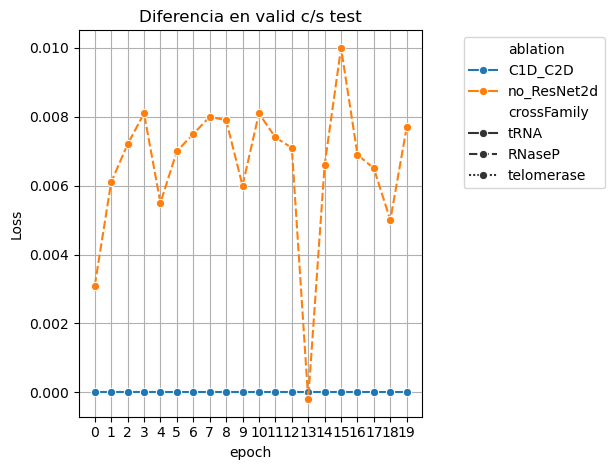

In [37]:
train_log_with_valid['diff'] = df_logs.query('ablation in ["C1D_C2D","no_ResNet_2d"] ')['valid_loss'] - train_log_with_valid.query('ablation in ["C1D_C2D","no_ResNet2d"]')['valid_loss']

fig, ax = plt.subplots()
sns.lineplot(data=train_log_with_valid.query('ablation != "sincfold_"'), x='epoch' ,y='diff',hue='ablation', style='crossFamily', marker='o', ax=ax)
ax.grid()
ax.set_xticks(range(20))
ax.set_ylabel('Loss')
ax.set_title('Diferencia en valid c/s test')
ax.legend(bbox_to_anchor=(1.1,1))
fig.tight_layout()
plt.show()

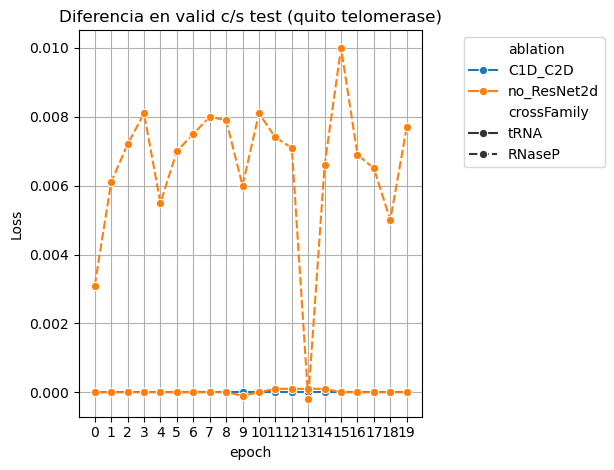

In [38]:
train_log_with_valid['diff'] = df_logs.query('ablation in ["C1D_C2D","no_ResNet2d"] & crossFamily != "telomerase"')['valid_loss'] - train_log_with_valid.query('ablation in ["C1D_C2D","no_ResNet2d"] & crossFamily != "telomerase"')['valid_loss']

fig, ax = plt.subplots()
sns.lineplot(data=train_log_with_valid.query('ablation != "sincfold_" & crossFamily != "telomerase"'), x='epoch' ,y='diff',hue='ablation', style='crossFamily', marker='o', ax=ax)
ax.grid()
ax.set_xticks(range(20))
ax.set_ylabel('Loss')
ax.set_title('Diferencia en valid c/s test (quito telomerase)')
ax.legend(bbox_to_anchor=(1.1,1))
fig.tight_layout()
plt.show()

## Analisis de modelos con 100 epocas

In [40]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

ABLATIONS_PATH = '../pruebas/crossFamily/weights/RNaseP/'
CROSSFAMILY_PATH = '../pruebas/crossFamily/weights/'

# Listado de ablations y homologies
# ablations = os.listdir(ABLATIONS_PATH)
ablations = ['C1D_C2D']
print(f"Ablations: {ablations}")

cross_families = os.listdir(CROSSFAMILY_PATH)
print(f"cross families: {cross_families}")

# Inicializamos una lista para almacenar los DataFrames de los archivos train_log.csv
train_logs = []

# Recorrer cada crossFamily y ablation para buscar los archivos train_log.csv
for crossFamily in cross_families:
    for ablation in ablations:
        # Ruta del subdirectorio donde se encuentran los archivos train_log.csv
        train_file_path = os.path.join(CROSSFAMILY_PATH, crossFamily, ablation,'100_epoch')
        
        # Verificamos si el directorio existe
        if os.path.isdir(train_file_path):
            # Verificar si el archivo 'train_log.csv' existe en el directorio
            train_file = 'train_log.csv'
            full_path = os.path.join(train_file_path, train_file)
            # Si el archivo existe, lo leemos
            if os.path.exists(full_path):
                try:
                    df = pd.read_csv(full_path)
                    
                    # Agregar columnas de 'ablation' y 'crossFamily'
                    df['ablation'] = ablation+'100_epoch'
                    df['crossFamily'] = crossFamily
                    
                    # Agregar el DataFrame a la lista
                    train_logs.append(df)
                    print(f"Successfully loaded {full_path}")
                except Exception as e:
                    print(f"Error loading {full_path}: {e}")

# Combinar todos los DataFrames en uno solo
if train_logs:
    df_logs = pd.concat(train_logs, ignore_index=True)
    print(f"Total rows in combined DataFrame: {df_logs.shape[0]}")
else:
    df_logs = pd.DataFrame()  # DataFrame vacío si no hay archivos cargados 


Ablations: ['C1D_C2D']
cross families: ['tRNA', 'RNaseP', 'telomerase']
Successfully loaded ../pruebas/crossFamily/weights/tRNA/C1D_C2D/100_epoch/train_log.csv
Successfully loaded ../pruebas/crossFamily/weights/RNaseP/C1D_C2D/100_epoch/train_log.csv
Successfully loaded ../pruebas/crossFamily/weights/telomerase/C1D_C2D/100_epoch/train_log.csv
Total rows in combined DataFrame: 300


In [41]:
df_logs

,epoch,train_f1,train_loss,valid_f1,valid_f1_post,valid_loss,ablation,crossFamily
0,0,0.2307,0.0666,0.2781,0.2716,0.0526,C1D_C2D100_epoch,tRNA
1,1,0.2907,0.0506,0.2803,0.3120,0.0494,C1D_C2D100_epoch,tRNA
2,2,0.3079,0.0483,0.3108,0.3366,0.0465,C1D_C2D100_epoch,tRNA
3,3,0.3230,0.0464,0.3304,0.3530,0.0445,C1D_C2D100_epoch,tRNA
4,4,0.3378,0.0453,0.3532,0.3626,0.0429,C1D_C2D100_epoch,tRNA
...,...,...,...,...,...,...,...,...
295,95,0.6479,0.0229,0.6291,0.6947,0.0256,C1D_C2D100_epoch,telomerase
296,96,0.6496,0.0227,0.6221,0.6919,0.0255,C1D_C2D100_epoch,telomerase
297,97,0.6516,0.0225,0.6490,0.6955,0.0262,C1D_C2D100_epoch,telomerase
298,98,0.6517,0.0228,0.6272,0.6962,0.0254,C1D_C2D100_epoch,telomerase


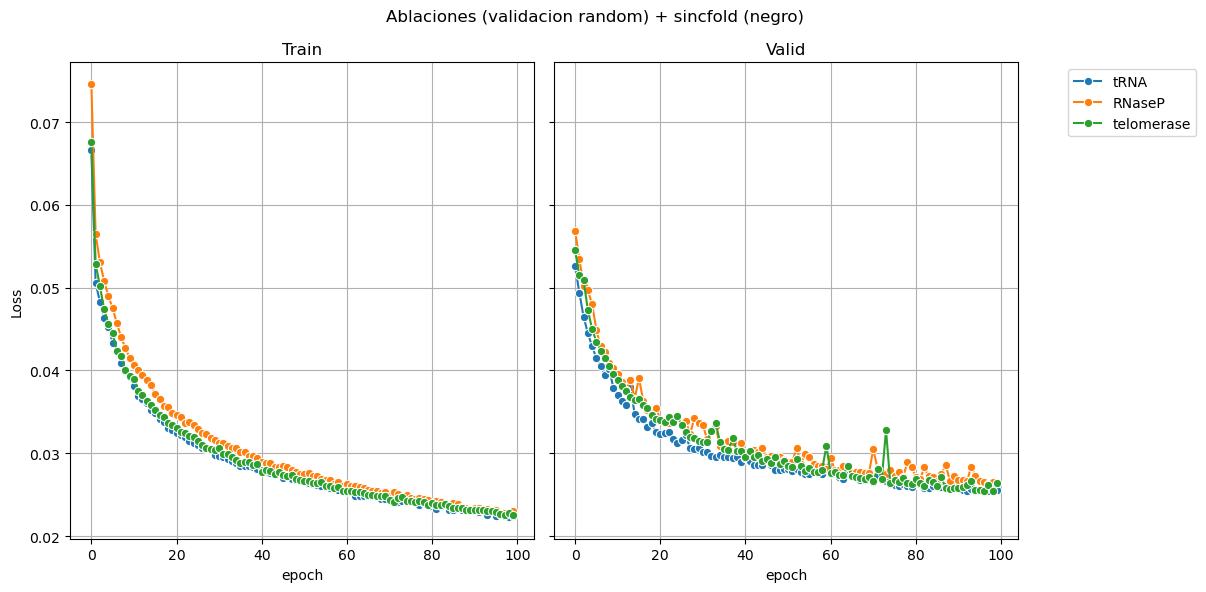

In [46]:
fig, axes = plt.subplots(1,2, figsize=(12,6), sharey=True)
 
sns.lineplot(data=df_logs, x='epoch' ,y='train_loss', hue='crossFamily', marker='o', ax=axes[0], legend=None)
sns.lineplot(data=df_logs, x='epoch' ,y='valid_loss', hue='crossFamily', marker='o', ax=axes[1])

# for ax in axes: ax.set_yscale('log')
for ax in axes: ax.grid() 
axes[0].set_ylabel('Loss')
axes[0].set_title('Train')
axes[1].set_title('Valid')
axes[1].legend(bbox_to_anchor=(1.4,1))
fig.suptitle('Ablaciones (validacion random) + sincfold (negro)')
fig.tight_layout()
plt.show()

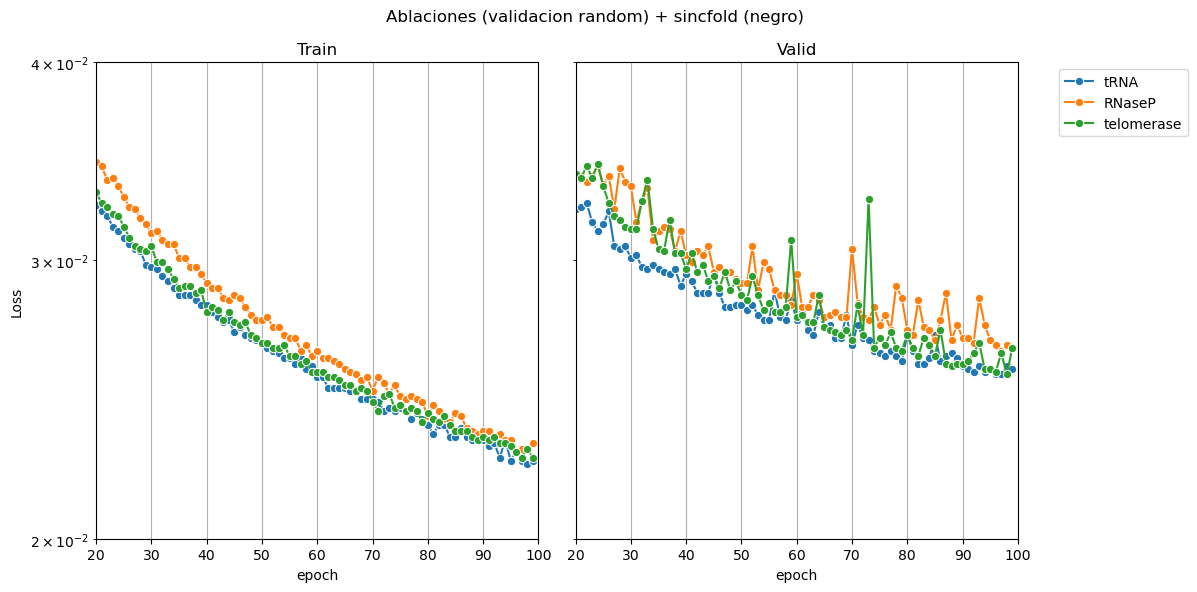

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,6), sharey=True)
 
sns.lineplot(data=df_logs, x='epoch' ,y='train_loss', hue='crossFamily', marker='o', ax=axes[0], legend=None)
sns.lineplot(data=df_logs, x='epoch' ,y='valid_loss', hue='crossFamily', marker='o', ax=axes[1])

for ax in axes: ax.grid() 
for ax in axes: ax.set_xlim([20,100])
for ax in axes: ax.set_ylim([0.02,0.04])
for ax in axes: ax.set_yscale('log')

axes[0].set_ylabel('Loss')
axes[0].set_title('Train')
axes[1].set_title('Valid')

axes[1].legend(bbox_to_anchor=(1.4,1))
fig.suptitle('Ablaciones (validacion random) + sincfold (negro)')
fig.tight_layout()
plt.show()